In [41]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imread
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [42]:
musk = pd.read_csv('Elon_musk.csv.crdownload',encoding = 'ISO-8859-1')
musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1490        1491  He might run for President in 2024 https://t.c...
1491        1492  @Erdayastronaut @nextspaceflight Not having lo...
1492        1493  @EverydayElon @ajtourville @comma_ai @Tesmania...
1493        1494  @WholeMarsBlog @ajtourville @comma_ai @Tesmani...
1494        1495  @DanielleFong @ajtourville @comma_ai @Tesmania...

[1495 rows x 2 columns]

In [43]:
# Checking for null values
musk.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [44]:
# Checking for duplicates
musk.duplicated().sum()

0

In [45]:
# Removing Unnamed column
musk.drop(['Unnamed: 0'],inplace=True,axis=1)

In [46]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1495 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [47]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1490    He might run for President in 2024 https://t.c...
1491    @Erdayastronaut @nextspaceflight Not having lo...
1492    @EverydayElon @ajtourville @comma_ai @Tesmania...
1493    @WholeMarsBlog @ajtourville @comma_ai @Tesmani...
1494    @DanielleFong @ajtourville @comma_ai @Tesmania...
Name: Text, Length: 1495, dtype: object

In [48]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [49]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x] 
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [50]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [51]:
# Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [52]:
# Tokenization
text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [53]:
len(text_tokens)

16295

In [54]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [56]:
# Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [57]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [58]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [59]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [60]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


### Feature Extraction :

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [62]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2189    188         1978  2954   3691        771  1382       2570   

   have   try  ...  aok  httpstcoztrmvq6wvx  president  2024  \
0  1377  3721  ...  239                1955       2847    35   

   httpstcowo34fhkugu  hydrocarbon  combustion  temperature  everydayelon  \
0                1896         1972         649         3543          1061   

   daniellefong  
0           782  

[1 rows x 4085 columns]

In [63]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11      2189
alien          188
idaacarmack   1978
ray           2954
trace         3691
...            ...
hydrocarbon   1972
combustion     649
temperature   3543
everydayelon  1061
daniellefong   782

[4085 rows x 1 columns]

In [64]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
ðogecoin         4084
zzcool           4083
zwiebelbach      4082
zshauladventure  4081
zone             4080
zon              4079
zogfotpik        4078
zip2             4077
zero             4076
zenit            4075
zeitmas          4074
zainraz4         4073
yup              4072
youyanggu        4071
your             4070
young            4069
younesh1989      4068
you              4067
york             4066
yolt             4065
yoda             4064
yo               4063
yet              4062
yesterday        4061
yes              4060
year             4059
yeah             4058
yea              4057
ye               4056
yaw              4055

In [65]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
005              0
10               1
100              2
1000             3
10000            4
107              5
10x              6
11               7
112              8
12               9
13              10
130pm           11
13arm13arm      12
13ericralph31   13
14              14
140pm           15
14yearold       16
15              17
155             18
16              19
162             20
18              21
1880s           22
1b              23
1matthewgarcia  24

In [66]:
print(vectorizer.vocabulary_)

{'kunalb11': 2189, 'alien': 188, 'idaacarmack': 1978, 'ray': 2954, 'trace': 3691, 'cyberpunk': 771, 'hdr': 1382, 'nextlevel': 2570, 'have': 1377, 'try': 3721, 'joerogan': 2128, 'spotify': 3371, 'great': 1325, 'interview': 2066, 'gtera27': 1343, 'doge': 900, 'underestimate': 3828, 'teslacn': 3558, 'congratulations': 688, 'tesla': 3553, 'china': 591, 'amazing': 205, 'execution': 1080, 'last': 2208, 'year': 4059, 'now': 2603, 'next': 2569, 'even': 1055, 'happy': 1366, 'new': 2566, 'ox': 2701, 'httpstco9wfkmyu2oj': 1534, 'frodo': 1227, 'underdoge': 3827, 'all': 190, 'thought': 3626, 'would': 4035, 'fail': 1107, 'himself': 1420, 'httpstcozgxjfdzzrm': 1948, 'owensparks': 2699, 'flcnhvy': 1172, 'anonyx10': 228, 'haha': 1353, 'thanks': 3589, 'indeed': 2019, 'tweets': 3742, 'definitely': 816, 'represent': 3021, 'realworld': 2975, 'time': 3643, 'allocation': 191, 'the': 3596, 'entertaining': 1017, 'outcome': 2683, 'likely': 2259, 'givedirectly': 1299, 'just': 2151, 'send': 3177, 'agree': 163, 'c

In [67]:
print(vectorizer.get_feature_names_out()[50:100])

['25k' '25th' '28' '28delayslater' '29' '2k' '2v' '30' '300' '301' '304'
 '304l' '31' '330' '360' '37' '39a' '3d' '3rd' '40' '400' '42' '420'
 '4227' '430' '43rd' '448' '45thspacewe' '4680' '48' '4d' '4th'
 '4thfromourstar' '50' '50000' '50k' '60' '60000' '69420' '727' '727pm'
 '78' '7th' '90' '9007' '91demigod' '922' '948' '95' '99']


In [68]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
print(X.toarray().shape)

(12164, 4085)


#### Let's see how can bigrams and trigrams can be included here

In [70]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1495x100 sparse matrix of type '<class 'numpy.int64'>'
	with 7358 stored elements in Compressed Sparse Row format>

In [71]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' 'about' 'all' 'amp' 'an' 'and' 'are' 'as' 'at' 'be' 'but' 'by'
 'can' 'cleantechnica' 'co' 'do' 'dragon' 'ercxspace' 'erdayastronaut'
 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha' 'has' 'have' 'https'
 'https co' 'id_aa_carmack' 'if' 'in' 'in the' 'is' 'it' 'just'
 'kristennetten' 'launch' 'like' 'make' 'marcushousegame' 'maybe' 'more'
 'most' 'much' 'my' 'nasaspaceflight' 'new' 'next' 'no' 'not' 'now' 'of'
 'of the' 'on' 'one' 'or' 'our' 'out' 'ppathole' 'probably' 'production'
 'rationaletienne' 're' 'rt' 'rt spacex' 'should' 'so' 'some' 'spacex'
 'starship' 'sure' 'tesla' 'teslaownerssv' 'teslarati' 'than' 'that' 'the'
 'there' 'they' 'this' 'this is' 'to' 'to be' 'to the' 'too' 'true' 'was'
 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with' 'would' 'yeah' 'year'
 'yes' 'you']


In [72]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer :

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm='',
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

InvalidParameterError: The 'norm' parameter of TfidfVectorizer must be a str among {'l2', 'l1'} or None. Got '' instead.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.de.stop_words import STOP_WORDS


tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(STOP_WORDS))

In [80]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

NotFittedError: Vocabulary not fitted or provided

In [81]:
print(tf_idf_matrix_n_gram_max_features.toarray())


NameError: name 'tf_idf_matrix_n_gram_max_features' is not defined

####  Generate wordcloud :

In [82]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    # Set figure size   
    plt.imshow(wordcloud)           # Display image    
    plt.axis("off")                 # No axis details

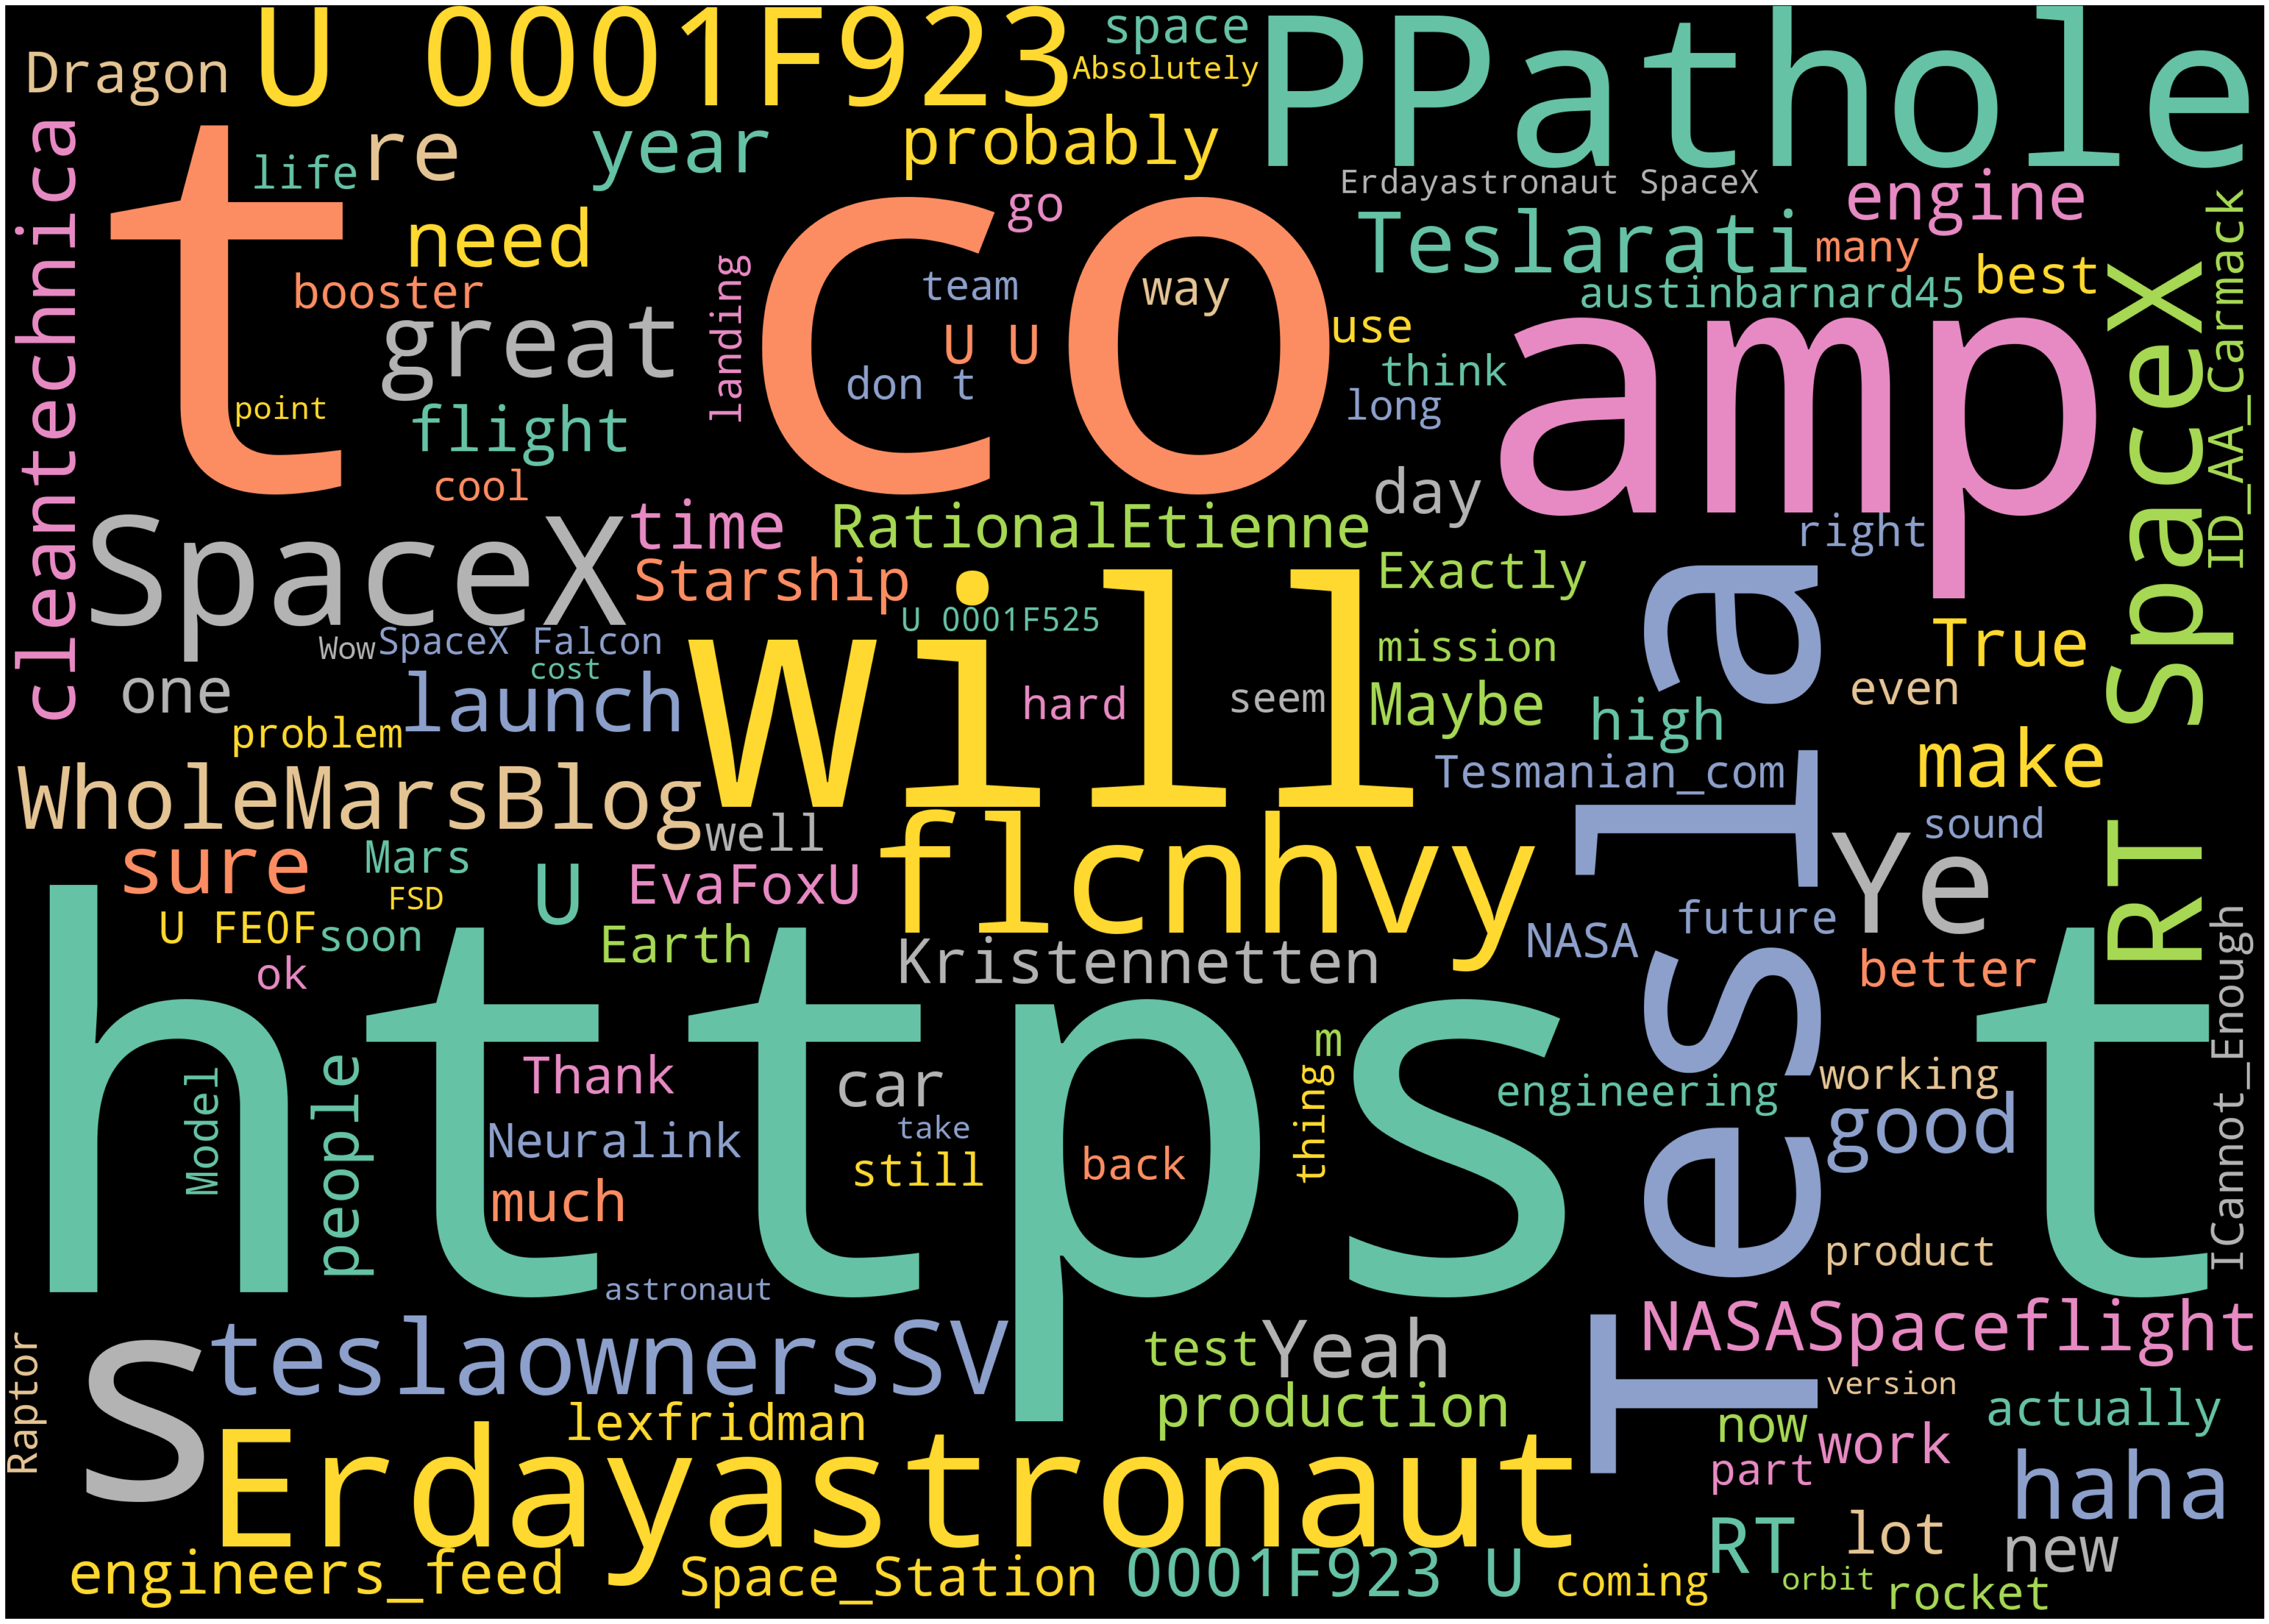

In [ ]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [83]:
musk2 = pd.read_csv('Elon_musk.csv.crdownload', encoding='ISO-8859-1')
musk2

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1490        1491  He might run for President in 2024 https://t.c...
1491        1492  @Erdayastronaut @nextspaceflight Not having lo...
1492        1493  @EverydayElon @ajtourville @comma_ai @Tesmania...
1493        1494  @WholeMarsBlog @ajtourville @comma_ai @Tesmani...
1494        1495  @DanielleFong @ajtourville @comma_ai @Tesmania...

[1495 rows x 2 columns]

In [84]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1490    He might run for President in 2024 https://t.c...
1491    @Erdayastronaut @nextspaceflight Not having lo...
1492    @EverydayElon @ajtourville @comma_ai @Tesmania...
1493    @WholeMarsBlog @ajtourville @comma_ai @Tesmani...
1494    @DanielleFong @ajtourville @comma_ai @Tesmania...
Name: Text, Length: 1495, dtype: object

In [85]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [86]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [87]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [88]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [89]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [90]:
len(nouns_verbs)

3

In [91]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [92]:
X.shape

(3, 3)

In [93]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [95]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [97]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

level  tracing  tried
0      0        1      0
1      1        0      0
2      0        0      1

In [98]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]], dtype=int64)

In [99]:
type(sum_words)

numpy.matrix

In [100]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [101]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [103]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})
wf_df

word  count
0    level      1
1  tracing      1
2    tried      1

#### Visualizing results :

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

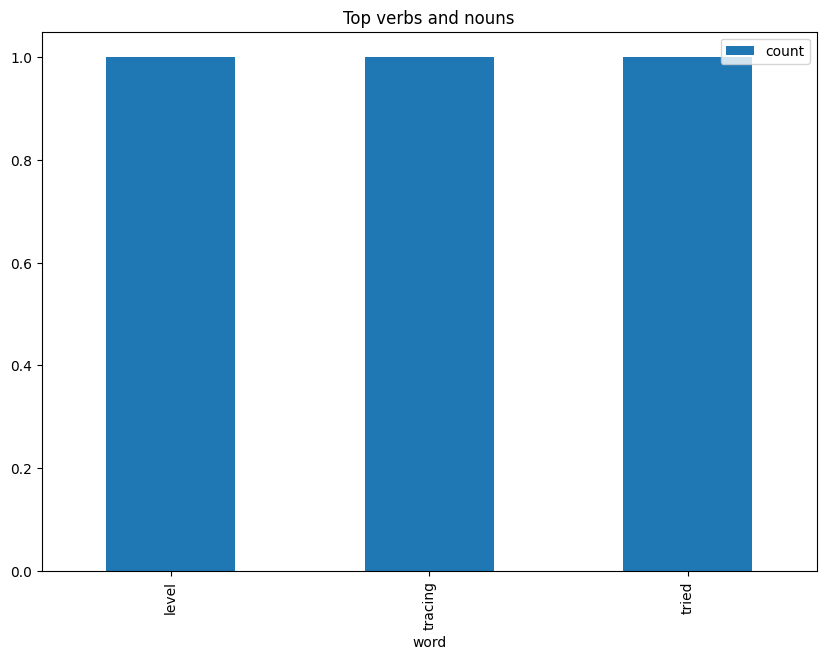

In [104]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

#### Emotion Mining :

In [111]:
#Sentiment analysis
data = pd.read_csv("Afinn.csv", encoding = 'ISO-8859-1')
data

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [112]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk2))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [113]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
692  Short, comprehensible laws voted on directly b...
693                                        Snake Jazz.
694  <U+0001F40D><U+0001F3B7> @WholeMarsBlog Its q...
695  @harsimranbansal @EvaFoxU True <U+0001F923><U+...
696  https://t.co/zTRMvQ6Wvx He might run for Presi...

[697 rows x 1 columns]

In [114]:
affinity_scores = data.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [115]:
nlp = spacy.load('en_core_web_sm')

In [116]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [117]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [118]:
calculate_sentiment(text = 'wonderful session')

4

In [119]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [120]:
calculate_sentiment(text = 'good')

3

In [121]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [122]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [123]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [124]:
sent_df

sentence  sentiment_value
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
692  Short, comprehensible laws voted on directly b...                0
693                                        Snake Jazz.                0
694  <U+0001F40D><U+0001F3B7> @WholeMarsBlog Its q...                1
695  @harsimranbansal @EvaFoxU True <U+0001F923><U+...                0
696  https://t.co/zTRMvQ6Wvx He might run for Presi...                3

[697 rows x 2 columns]

In [125]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [126]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
692  Short, comprehensible laws voted on directly b...                0   
693                                        Snake Jazz.                0   
694  <U+0001F40D><U+0001F3B7> @WholeMarsBlog Its q...                1   
695  @harsimranbansal @EvaFoxU True <U+0001F923><U+...                0   
696  https://t.co/zTRMvQ6Wvx He might run for Presi...                3   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
692           9  
693           2  
694          38  
695          16  
696          43  

[697 rows x 3 columns]

In [127]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
185  Theres some great AI out ther
 https://t.co/v...               10   
492  Gives a false sense of
 https://t.co/aIGaEnC8f...               10   
226  @PPathole @karpathy For a second there, I thou...               11   
161  @harsimranbansal @heydave7 It will most likely...               11   
186  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
648  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  
185          48  
492          41  
226          69  
161          93  
186          98  
81           38  
648          65  
588         138  
36          231  
105          94

In [128]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
614  Then static fire, checkouts, static fire, fly ...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
382  No problem if theres a way get current design...               -3   
544  We are prioritizing emergency responders &amp;...               -3   
298  No symptoms for past few days, apart from fati...               -3   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
285  Production/testing of rocket engines is over 9...               -3   
438  @SpaceX Just a small-seeming issue with loss o...               -3   
235  @RationalEtienne @MarcusHouseGame Not yet @Sta...               -3   
633                        You are a modern day moron.               -3   
90     All three static fires completed &amp; no RUDs!               -3   
482  He plays the poor inventor card, but was ric...               -3   
502  @tesladri @ChananBos @raytech247 @WholeMarsBlo...               -3   

     word_count  
650          60  
64           11  
614          12  
683          39  
382          13  
544          13  
298           9  
23           37  
285          21  
438          11  
235           8  
633           6  
90            8  
482          34  
502          38

In [129]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    697.000000
mean       1.377331
std        2.698382
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [130]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   

   word_count  
0          13  
1           4  
4           8  
5           6  
6          14

In [131]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
64   Also, the road to hell is mostly paved with ba...               -7   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   

     word_count  
64           11  
650          60

In [132]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
650    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
Name: sentence, dtype: object

In [133]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.']

In [134]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [135]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

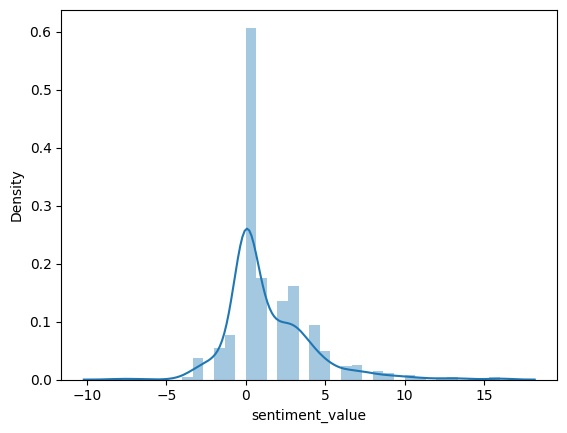

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

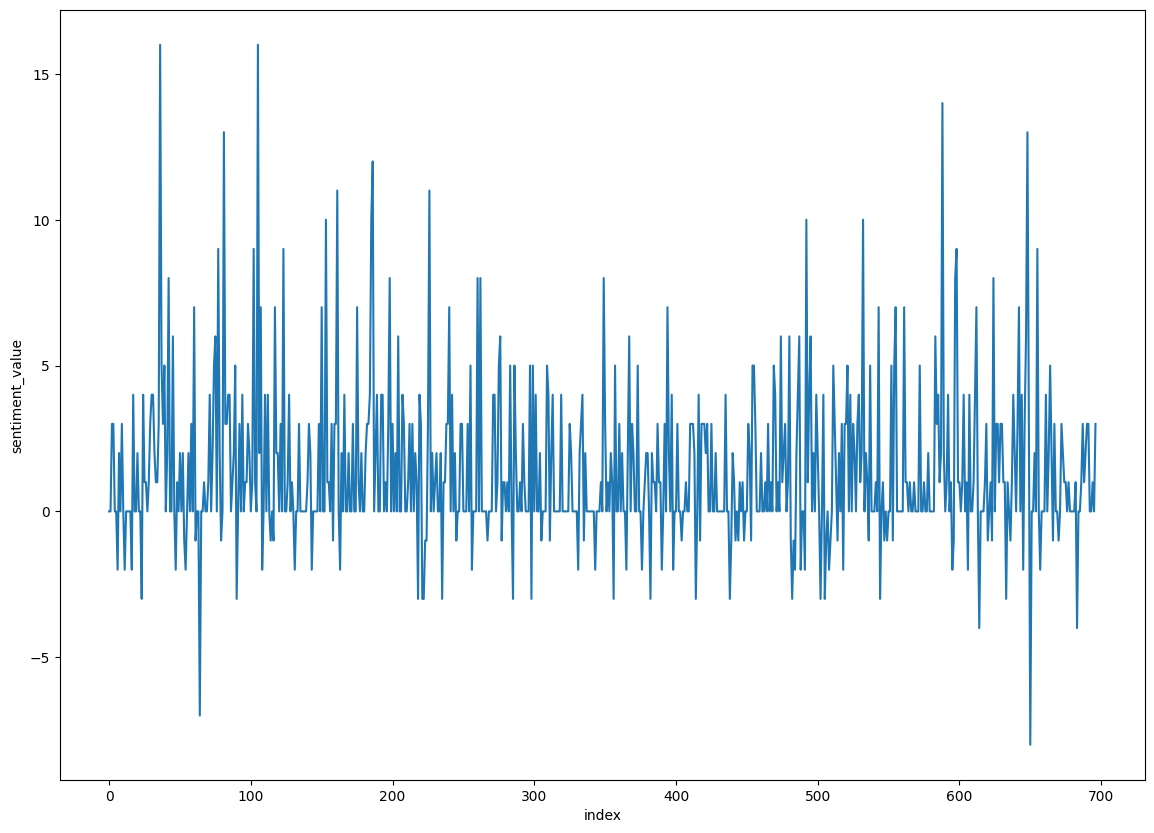

In [137]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

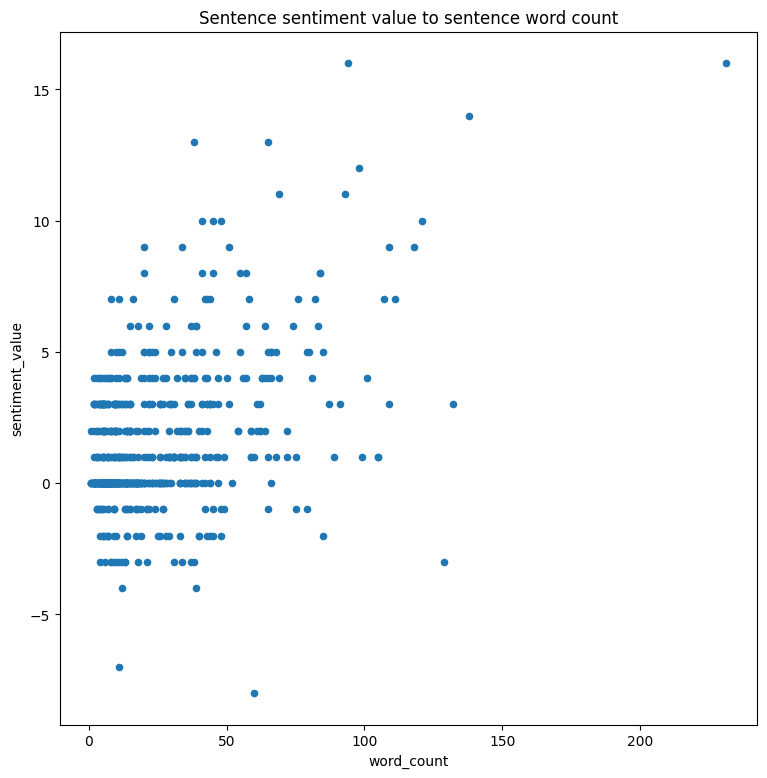

In [138]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [139]:
# PW for positive words 
# NW for Negative Words 

In [140]:
PW=pd.read_csv("C:/Users/mewit/Desktop/Data Science Notes/Assignmnets/11 - Text Mining/positive-words.txt", on_bad_lines='skip')
PW

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mewit/Desktop/Data Science Notes/Assignmnets/11 - Text Mining/positive-words.txt'

In [ ]:
NW=pd.read_csv("C:/Users/mewit/Desktop/Data Science Notes/Assignmnets/11 - Text Mining/negative-words.txt", on_bad_lines ='skip', encoding='latin-1')
NW

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [141]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

NameError: name 'PW' is not defined

In [142]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

NameError: name 'NW' is not defined

In [143]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

NameError: name 'PW' is not defined

In [144]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [145]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [146]:
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
692  Short, comprehensible laws voted on directly b...                0   
693                                        Snake Jazz.                0   
694  <U+0001F40D><U+0001F3B7> @WholeMarsBlog Its q...                1   
695  @harsimranbansal @EvaFoxU True <U+0001F923><U+...                0   
696  https://t.co/zTRMvQ6Wvx He might run for Presi...                3   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
692           9    692  
693           2    693  
694          38    694  
695          16    695  
696          43    696  

[697 rows x 4 columns]

In [147]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
692  Short, comprehensible laws voted on directly b...                0   
693                                        Snake Jazz.                0   
694  <U+0001F40D><U+0001F3B7> @WholeMarsBlog Its q...                1   
695  @harsimranbansal @EvaFoxU True <U+0001F923><U+...                0   
696  https://t.co/zTRMvQ6Wvx He might run for Presi...                3   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
692           9    692  
693           2    693  
694          38    694  
695          16    695  
696          43    696  

[697 rows x 4 columns]

In [148]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
648  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  index  
81           38     81  
648          65    648  
588         138    588  
36          231     36  
105          94    105

In [149]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
614  Then static fire, checkouts, static fire, fly ...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
382  No problem if theres a way get current design...               -3   

     word_count  index  
650          60    650  
64           11     64  
614          12    614  
683          39    683  
382          13    382

In [150]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    697.000000
mean       1.377331
std        2.698382
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [151]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
6   https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
11  However, if we don
 https://t.co/9Z8Ac6skqx @R...               -2   
16                        Thats what youre missing.               -2   
23  https://t.co/UEEocOfcTb The people have spoken...               -3   
47  Would be better to have small fees than no fee...               -2   

    word_count  index  
6           14      6  
11          40     11  
16           4     16  
23          37     23  
47          48     47

In [152]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...               -2   
16                         Thats what youre missing.               -2   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
47   Would be better to have small fees than no fee...               -2   
54   Car guesses drive direction based on what obst...               -2   
64   Also, the road to hell is mostly paved with ba...               -7   
90     All three static fires completed &amp; no RUDs!               -3   
108  A large solar field or reactor is needed for p...               -2   
131  Destiny, destiny\nNo escaping \nthat for me Al...               -2   
143              Stop the sneaky moves, Charlie Ergen!               -2   
163                      What could possibly go wrong?               -2   
218  RT @boringcompany: Tunnel Rave https://t.co/d3...               -3   
221  @RGVaerialphotos It will be real soon @MarcusH...               -3   
222  External
 https://t.co/csIZk6sEVu @bcart03 @ne...               -3   
235  @RationalEtienne @MarcusHouseGame Not yet @Sta...               -3   
256                       They stole Apples code too.               -2   
285  Production/testing of rocket engines is over 9...               -3   
298  No symptoms for past few days, apart from fati...               -3   
331  Their main PCR search is for the N1 gene, uniq...               -2   
343  Two tests came back negative, two cam
 https:/...               -2   
356  Austin jobs now avai https://t.co/d0i2w8wNKG Y...               -3   
365  4D is essential for dynamically occluded objec...               -2   
376  The Model 3 ramp was extreme stress &amp; pa
 ...               -2   
382  No problem if theres a way get current design...               -3   
390  Although, if it fails right at the end, some l...               -2   
398  But, frankly, I think
 https://t.co/s5xouoedjT...               -2   
414                                 Also Dead Space 2.               -3   
438  @SpaceX Just a small-seeming issue with loss o...               -3   
482  He plays the poor inventor card, but was ric...               -3   
484  @RationalEtienne @toadmeister Yes, failure to ...               -2   
488  @johnkrausphotos @Patreon @SuperclusterHQ @Spa...               -2   
491    We barked up that tree for way too long (sigh).               -2   
502  @tesladri @ChananBos @raytech247 @WholeMarsBlo...               -3   
505  @raytech247 @WholeMarsBlog Even GM &amp; Chrys...               -3   
508        Fully burdened cost depends on flight rate.               -2   
518  https://t.co/on2f1pY5jt @cleantechnica So craz...               -2   
544  We are prioritizing emergency responders &amp;...               -3   
595  <U+0001F5A4> Fallout Radio  <U+0001F5A4>\nhttp...               -2   
606       Nobody digs your grave better than yourself.               -2   
614  Then static fire, checkouts, static fire, fly ...               -4   
633                        You are a modern day moron.               -3   
645  Its when you hang out there that problems arise.               -2   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
657  It is impossible until you understand it, and ...               -2   
683  Occasional flights from land are ok, but frequ...               -4   

     word_count  index  
6            14      6  
11           40     11  
16            4     16  
23           37     23  
47           48     47  
54           14     54  
64           11     64  
90            8     90  
108          25    108  
131          33    131  
143           6    143  
163           5    163  
218         129    218  
221          18    221  
222          31    222  
235           8    235  
256           5    256  
285          21    285  
298           9    298  
331          28    3

In [153]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

6      https://t.co/9WFKMYu2oj Frodo was the underdog...
11     However, if we don
 https://t.co/9Z8Ac6skqx @R...
16                           Thats what youre missing.
23     https://t.co/UEEocOfcTb The people have spoken...
47     Would be better to have small fees than no fee...
54     Car guesses drive direction based on what obst...
64     Also, the road to hell is mostly paved with ba...
90       All three static fires completed &amp; no RUDs!
108    A large solar field or reactor is needed for p...
131    Destiny, destiny\nNo escaping \nthat for me Al...
143                Stop the sneaky moves, Charlie Ergen!
163                        What could possibly go wrong?
218    RT @boringcompany: Tunnel Rave https://t.co/d3...
221    @RGVaerialphotos It will be real soon @MarcusH...
222    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
235    @RationalEtienne @MarcusHouseGame Not yet @Sta...
256                         They stole Apples code too.
285    Production/testing of ro

In [154]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'However, if we don\x85 https://t.co/9Z8Ac6skqx @RationalEtienne @Adamklotz_ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or\x85 https://t.co/7J1c92hdjl @ID_AA_Carmack Lowest cost per ton of carbon sequestered, net of value of any product made.',
 'That\x92s what you\x92re missing.',
 'https://t.co/UEEocOfcTb The people have spoken \x85 https://t.co/x41oVMzTGo @Nivetha_7_42 @lexfridman So cute <U+0001F495> @UniverCurious Extremely misleading image, as doesn\x92t reflect true time cost to people or rain &amp; pain <U+0001F3B6> Who let the Doge out <U+0001F3B6> Hodl the rainforests!!',
 'Would be better to have small fees than no fees, as latter makes Robin\x85 https://t.co/czRhLolYVO Here come the shorty apologists\nGive them no respect\nGet Shorty u can\x92t sell houses u don\x92t own\nu can\x92t sell cars u don\x92t own\nbut \nu *can* sell stock

In [155]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

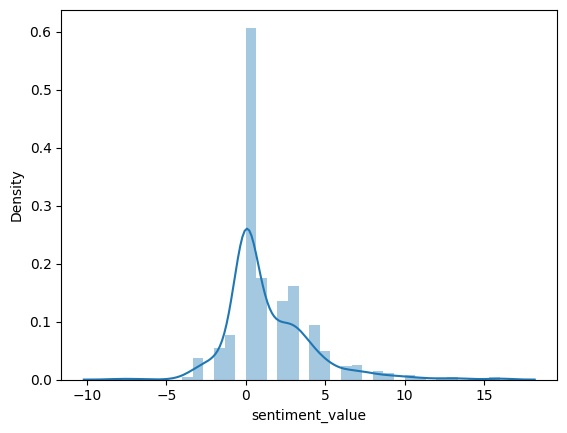

In [156]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

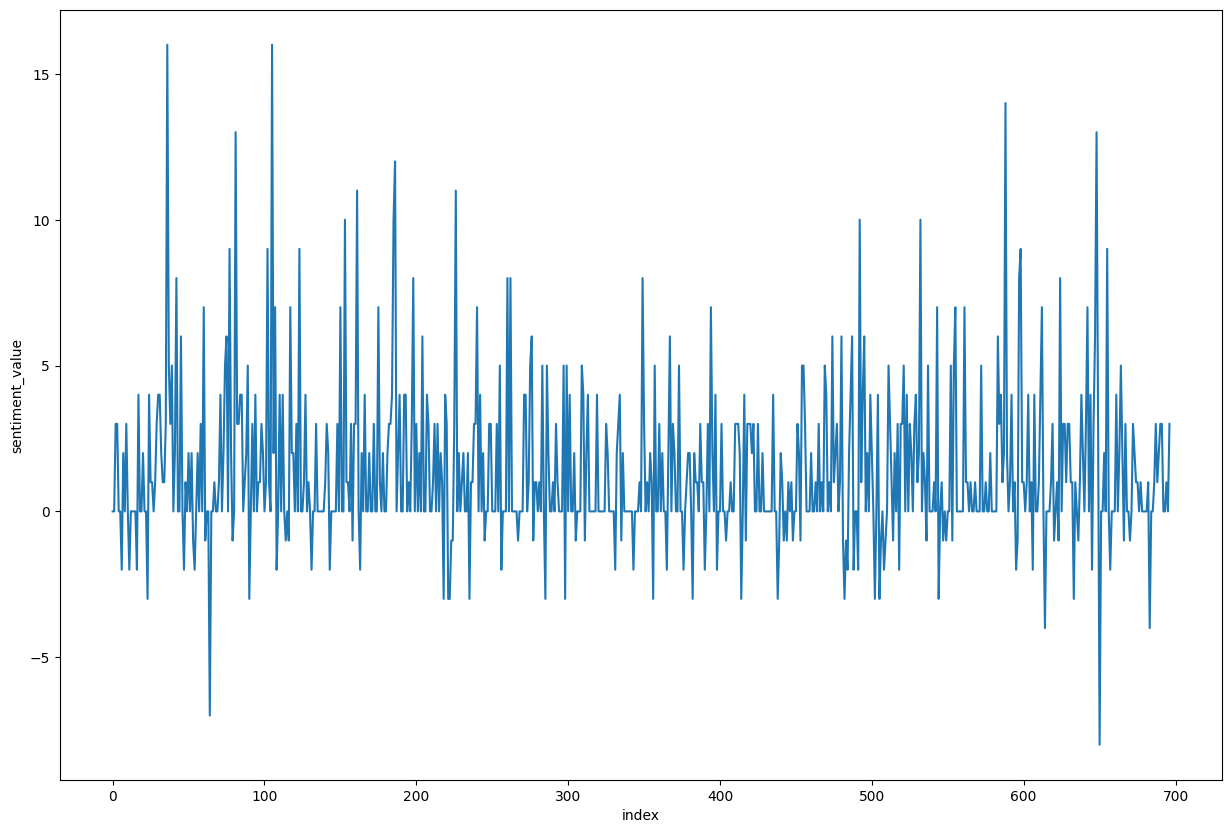

In [157]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

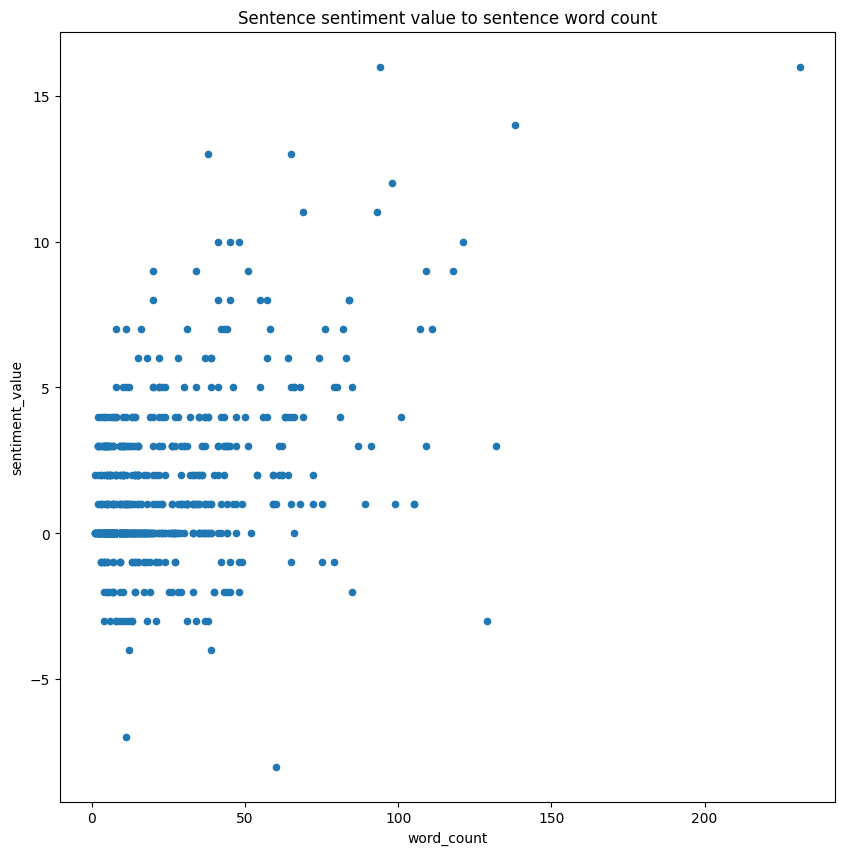

In [158]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

In [159]:
# NLP english language model of spacy library
nlp = spacy

In [160]:
spacy

<module 'spacy' from 'c:\\Users\\Acer\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\spacy\\__init__.py'>